**Data Exploration and Preprocessing**

In [444]:
import pandas as pd

df = pd.read_csv("german_credit_data.csv")

print(df)



     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  
0          

In [445]:
print(df.info())
print(df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None
<bound method NDFrame.describe of      Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   

In [448]:
missing_summary = df.isna().sum()

print("\n Missing Value Summary:")
print(missing_summary)

print("\nMissing Percentage per Column:")
print((df.isna().mean() * 100).round(2))



 Missing Value Summary:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Missing Percentage per Column:
Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64


In [449]:
df.replace('NA', pd.NA, inplace=True)

df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)

print("\nFinal Missing Value Check:")
print(df.isna().sum())



Final Missing Value Check:
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


<ipython-input-449-f1eacb1dcb5b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
<ipython-input-449-f1eacb1dcb5b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [196]:
print(df)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own          little           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little           little   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little           little   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little           little   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  
0          

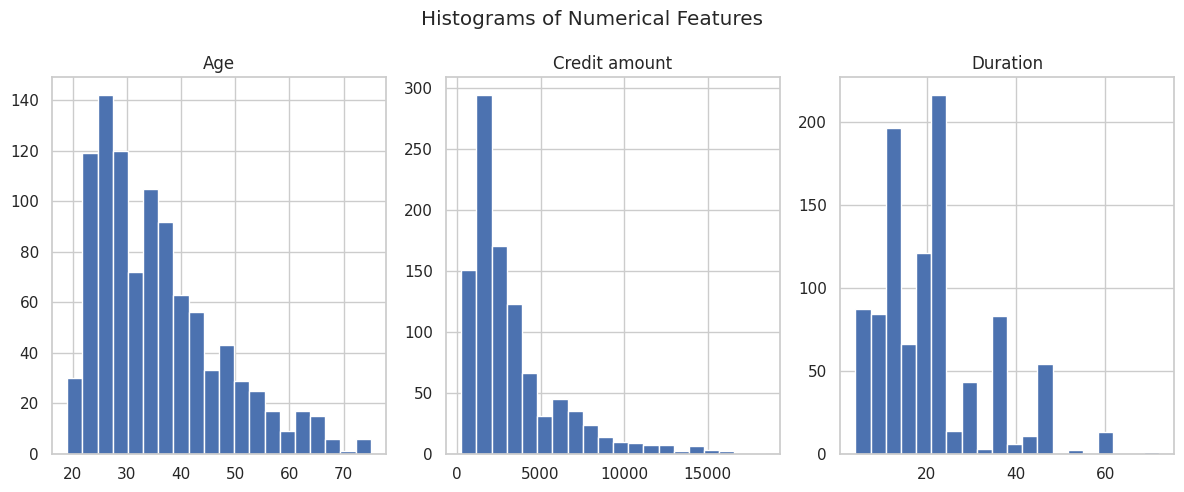

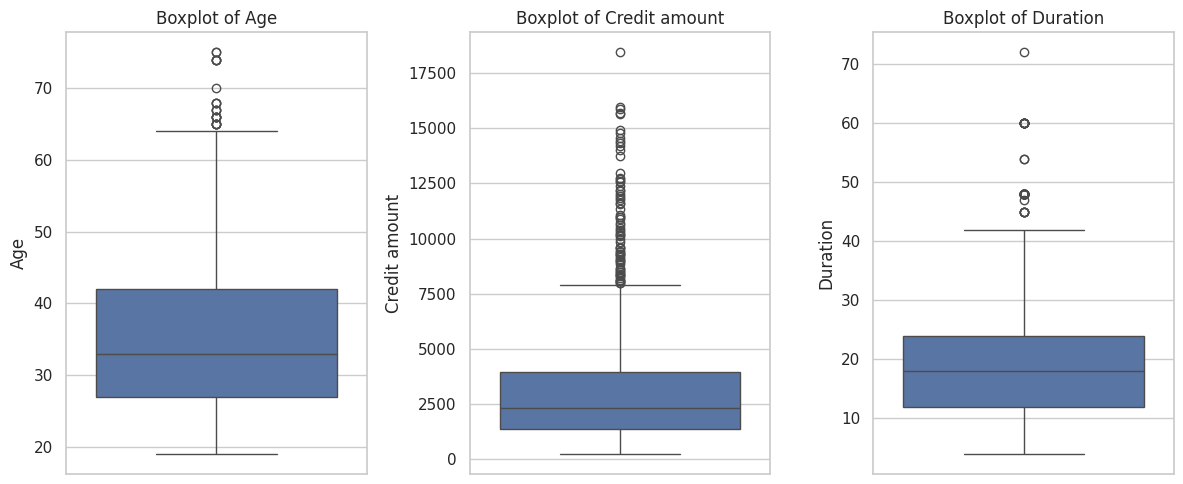

In [450]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['Age', 'Credit amount', 'Duration']].hist(bins=20, figsize=(12, 5), layout=(1, 3))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


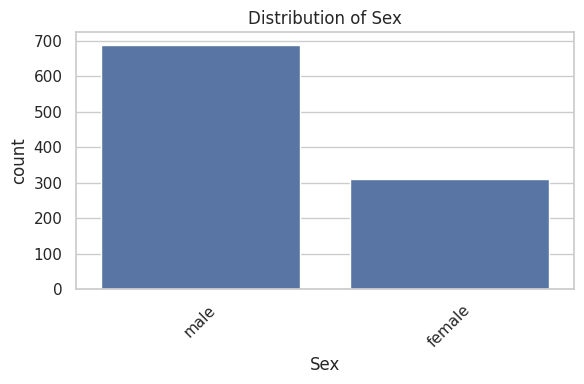

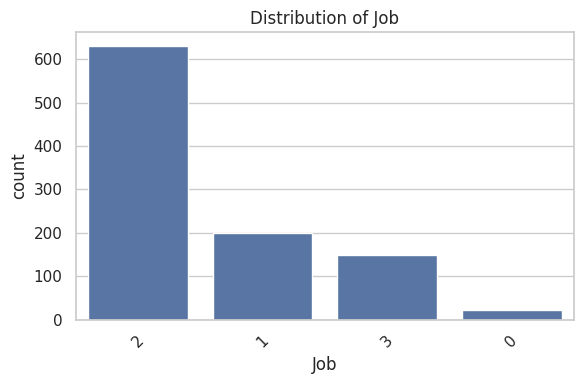

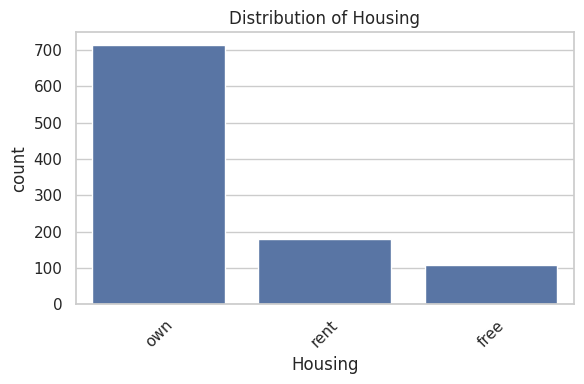

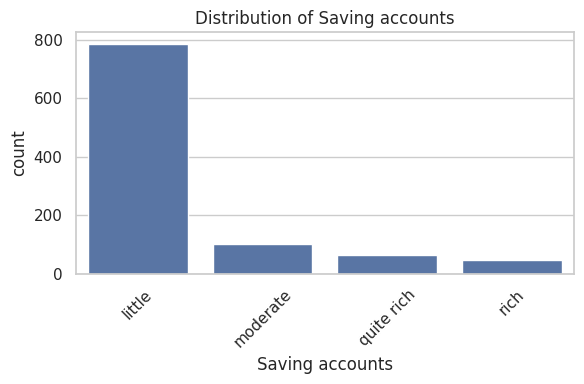

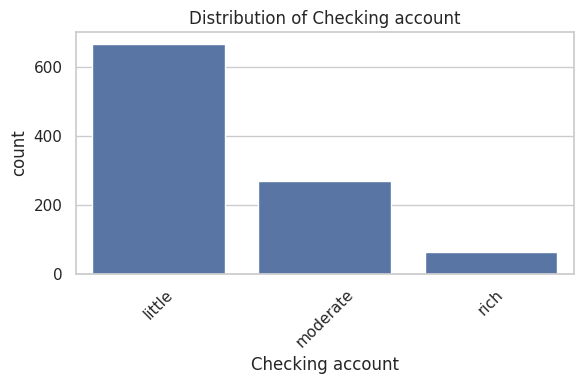

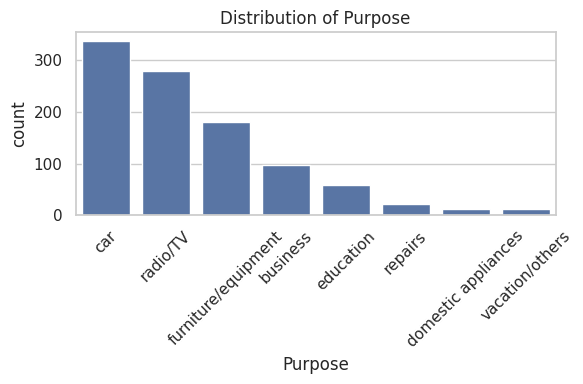

In [198]:
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-199-a0e0e4696672>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cat_list[count]],ax=ax[i][0],kde=False,color="#F43EEC")
<ipython-input-199-a0e0e4696672>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[cat_list[count]],ax=ax[i][1],shade=True,color="#359F4B")
<ipython-input-199-a0e0e4696672>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (

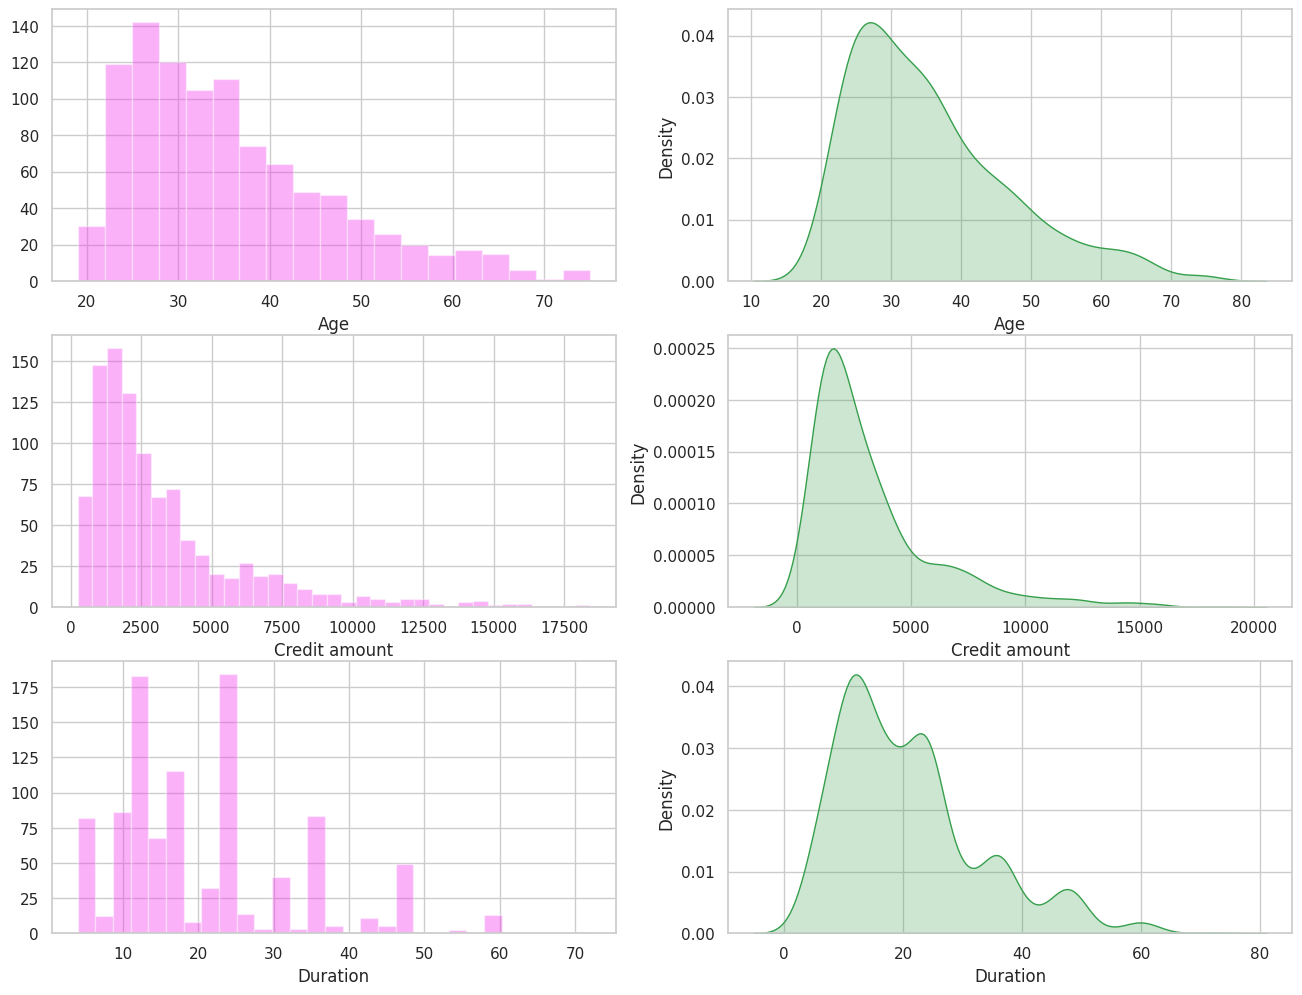

In [199]:
sns.set(font_scale=1,style="whitegrid")
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(16,12))
cat_list=["Age","Credit amount","Duration"]
count=0
for i in range(3):
    sns.distplot(df[cat_list[count]],ax=ax[i][0],kde=False,color="#F43EEC")
    sns.kdeplot(df[cat_list[count]],ax=ax[i][1],shade=True,color="#359F4B")
    count+=1

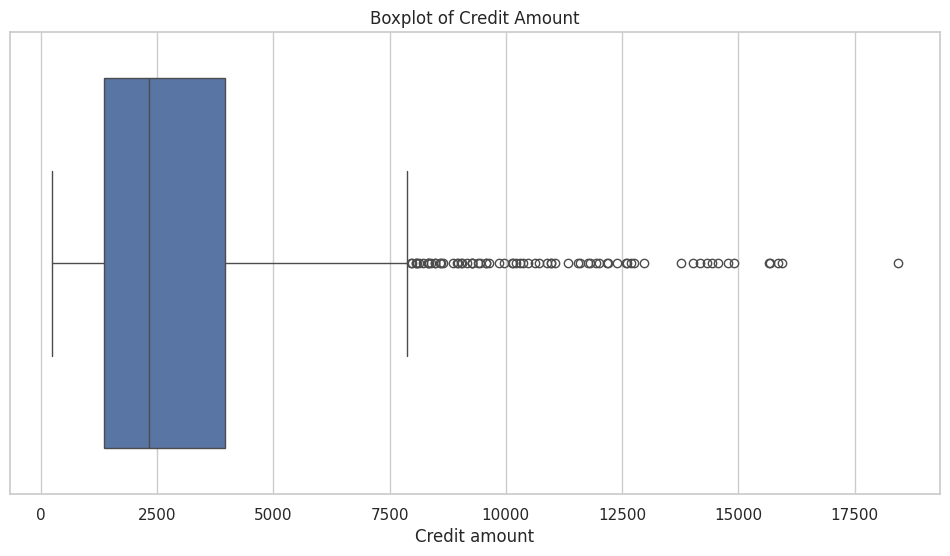

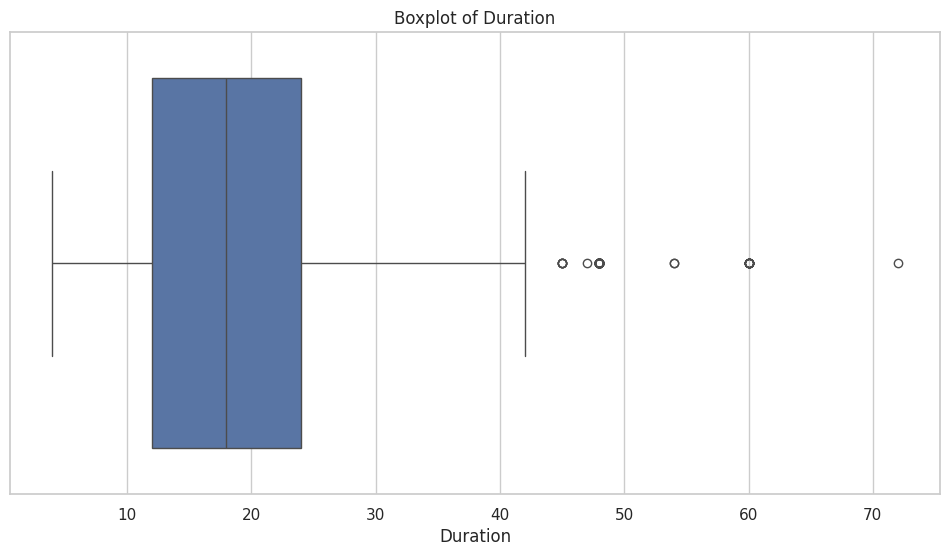

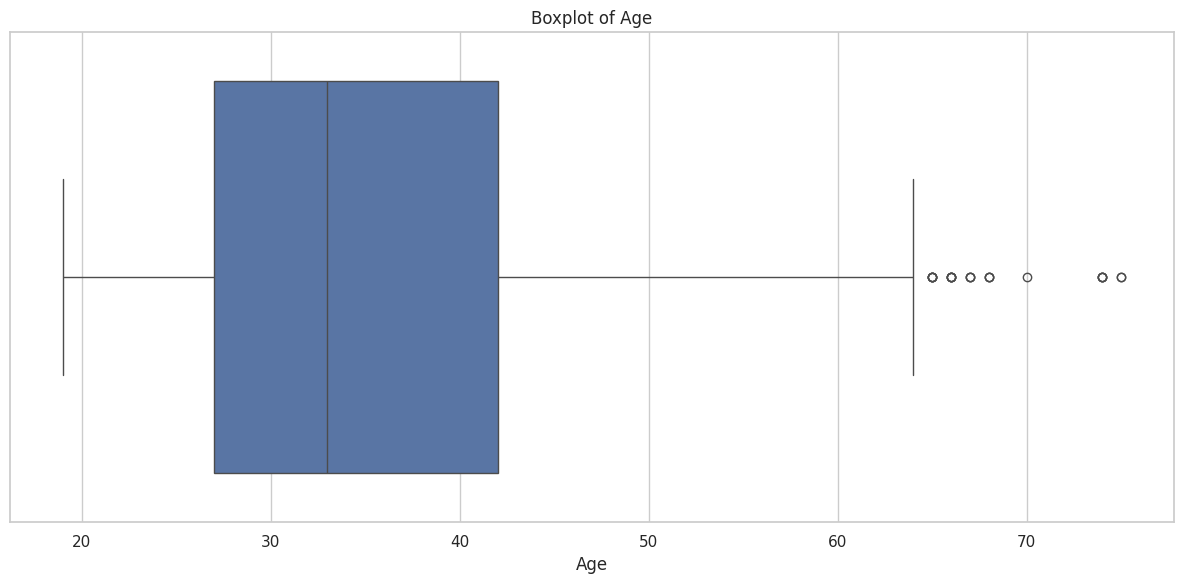

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Credit amount'])
plt.title('Boxplot of Credit Amount')

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Duration'])
plt.title('Boxplot of Duration')

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()

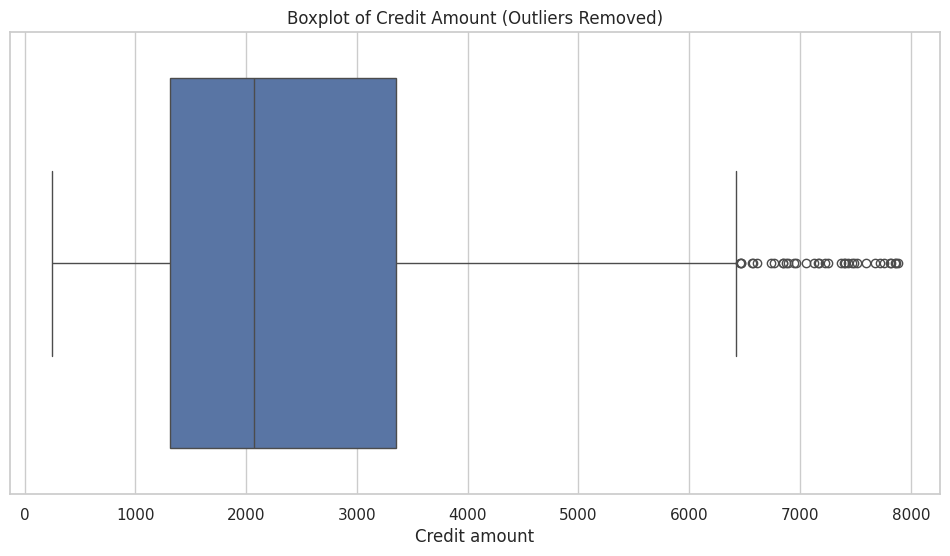

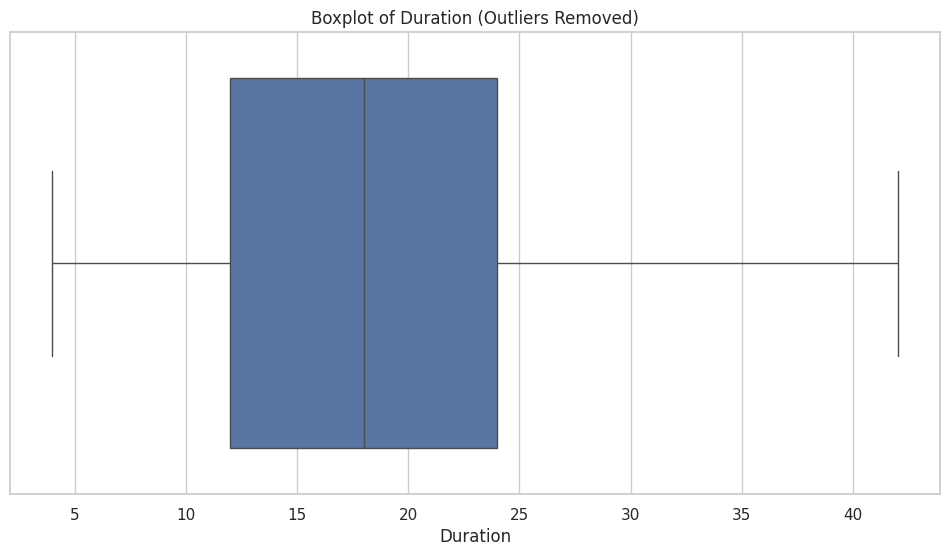

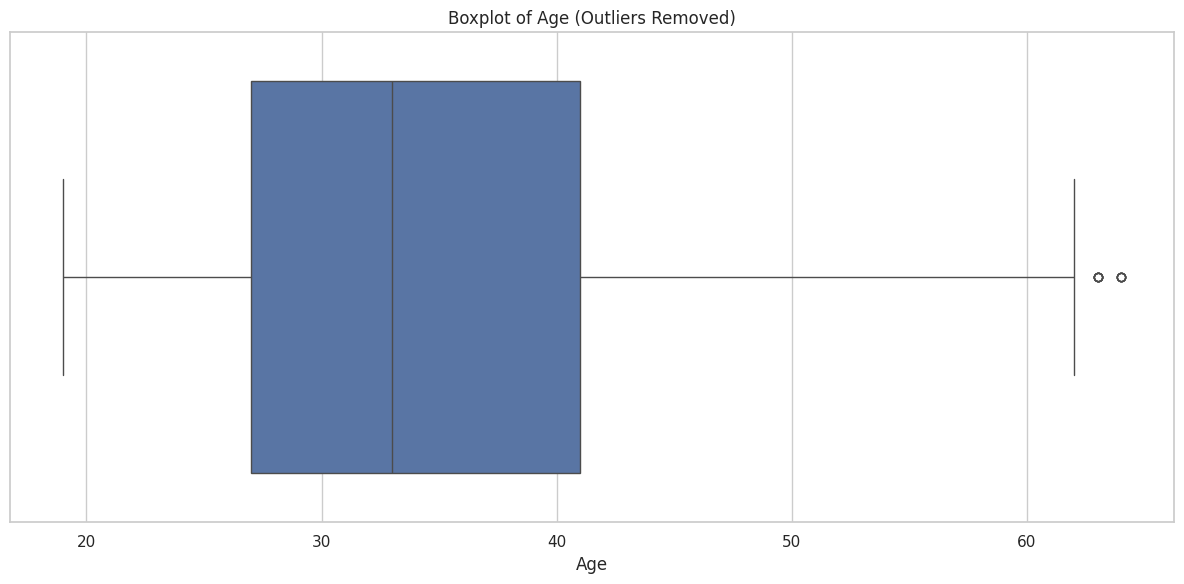

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers(df, 'Credit amount')
df_cleaned = remove_outliers(df_cleaned, 'Duration')
df_cleaned = remove_outliers(df_cleaned, 'Age')

plt.figure(figsize=(12, 6))

sns.boxplot(x=df_cleaned['Credit amount'])
plt.title('Boxplot of Credit Amount (Outliers Removed)')

plt.figure(figsize=(12, 6))

sns.boxplot(x=df_cleaned['Duration'])
plt.title('Boxplot of Duration (Outliers Removed)')

plt.figure(figsize=(12, 6))

sns.boxplot(x=df_cleaned['Age'])
plt.title('Boxplot of Age (Outliers Removed)')

plt.tight_layout()
plt.show()


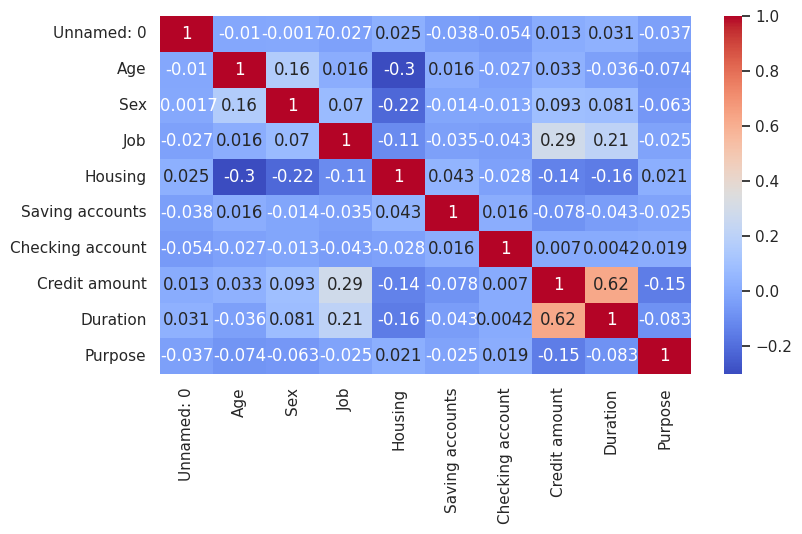

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Job'] = label_encoder.fit_transform(df['Job'])
df['Housing'] = label_encoder.fit_transform(df['Housing'])
df['Saving accounts'] = label_encoder.fit_transform(df['Saving accounts'])
df['Checking account'] = label_encoder.fit_transform(df['Checking account'])
df['Purpose'] = label_encoder.fit_transform(df['Purpose'])

corr = df.corr()

plt.figure(figsize=(8.5, 5.5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")

plt.tight_layout()
plt.show()


In [454]:
unique_categories = {
    'Age': df['Age'].unique(),
    'Sex': df['Sex'].unique(),
    'Job': df['Job'].unique(),
    'Housing': df['Housing'].unique(),
    'Saving accounts': df['Saving accounts'].unique(),
    'Checking account': df['Checking account'].unique(),
    'Purpose': df['Purpose'].unique()
}

for column, values in unique_categories.items():
    print(f"Unique categories for {column}:")
    print(values)
    print("\n")


Unique categories for Age:
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]


Unique categories for Sex:
[1 0]


Unique categories for Job:
[2 1 3 0]


Unique categories for Housing:
[1 0 2]


Unique categories for Saving accounts:
[0 2 3 1]


Unique categories for Checking account:
[0 1 2]


Unique categories for Purpose:
[5 3 4 1 0 2 6 7]




In [455]:
df['Credit amount'] = df['Credit amount'].astype(int)
df['Duration'] = df['Duration'].astype(int)

unique_categories = {
    'Age': df['Age'].unique(),
    'Job': df['Job'].unique(),
    'Housing': df['Housing'].unique(),
    'Saving accounts': df['Saving accounts'].unique(),
    'Checking account': df['Checking account'].unique(),
    'Credit amount': df['Credit amount'].unique(),
    'Duration': df['Duration'].unique(),
    'Purpose': df['Purpose'].unique()
}

for column, values in unique_categories.items():
    print(f"Unique categories for {column}:")
    print(values)
    print("\n")


Unique categories for Age:
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]


Unique categories for Job:
[2 1 3 0]


Unique categories for Housing:
[1 0 2]


Unique categories for Saving accounts:
[0 2 3 1]


Unique categories for Checking account:
[0 1 2]


Unique categories for Credit amount:
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337

In [456]:
# def label_credit_risk(row):
#     if (
#         row['Age'] <= 25 or
#         row['Job'] == 0 or
#         row['Credit amount'] > 8000

#     ):
#         return 1
#     else:
#         return 0

def label_credit_risk(row):
    if (
        row['Age'] <= 25 or
        row['Job'] == 0 or
        row['Credit amount'] > 8000 or
        (row['Saving accounts'] in ['little', 'none'] and row['Checking account'] in ['little', 'none'])     ):
        return 1
    else:
        return 0



In [459]:
df['Risk_Label'] = df.apply(label_credit_risk, axis=1)


In [347]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk_Label
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,996,40,male,3,own,little,little,3857,30,car,1
997,997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,1


In [457]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1n93VF7ArlFj9H1Kt_IpV2xF9lQDYngW5FpnNLcYoa1k/edit#gid=0


In [460]:
counts = df['Risk_Label'].value_counts()

print(counts)


Risk_Label
0    736
1    264
Name: count, dtype: int64


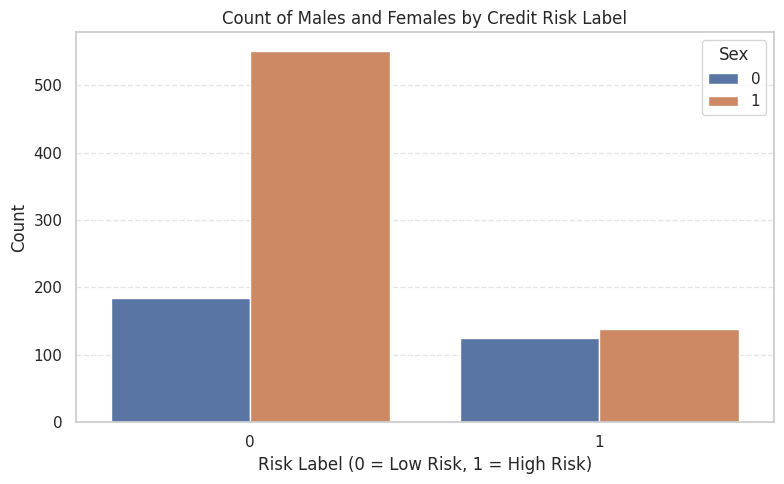

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Risk_Label', hue='Sex')
plt.title("Count of Males and Females by Credit Risk Label")
plt.xlabel("Risk Label (0 = Low Risk, 1 = High Risk)")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Logical Regression

In [465]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


label_encoder = LabelEncoder()
df['Risk_Label'] = label_encoder.fit_transform(df['Risk_Label'])

X = df.drop(columns=['Risk_Label'])
y = df['Risk_Label']

categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_cols = ['Age', 'Credit amount', 'Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       147
           1       0.94      0.62      0.75        53

    accuracy                           0.89       200
   macro avg       0.91      0.80      0.84       200
weighted avg       0.90      0.89      0.88       200



In [466]:
import joblib

joblib.dump(logreg_pipeline, 'credit_risk_model.pkl')


['credit_risk_model.pkl']

In [467]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

joblib.dump(logreg_pipeline, 'credit_risk_model.pkl')

y_pred_logreg = logreg_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy:.4f}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Accuracy: 0.8900
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       147
           1       0.94      0.62      0.75        53

    accuracy                           0.89       200
   macro avg       0.91      0.80      0.84       200
weighted avg       0.90      0.89      0.88       200



Accuracy: 0.8900
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       147
           1       0.94      0.62      0.75        53

    accuracy                           0.89       200
   macro avg       0.91      0.80      0.84       200
weighted avg       0.90      0.89      0.88       200

Confusion Matrix:
[[145   2]
 [ 20  33]]


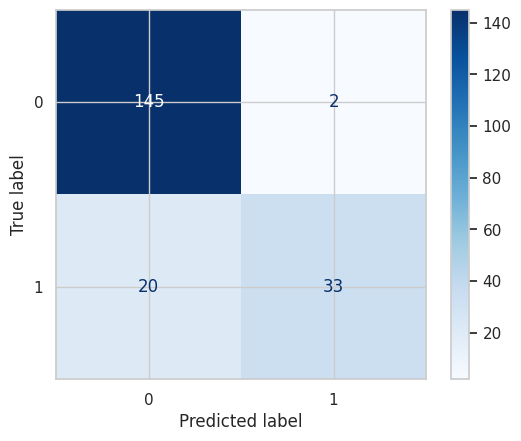

In [468]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

joblib.dump(logreg_pipeline, 'credit_risk_model.pkl')

y_pred_logreg = logreg_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy:.4f}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')


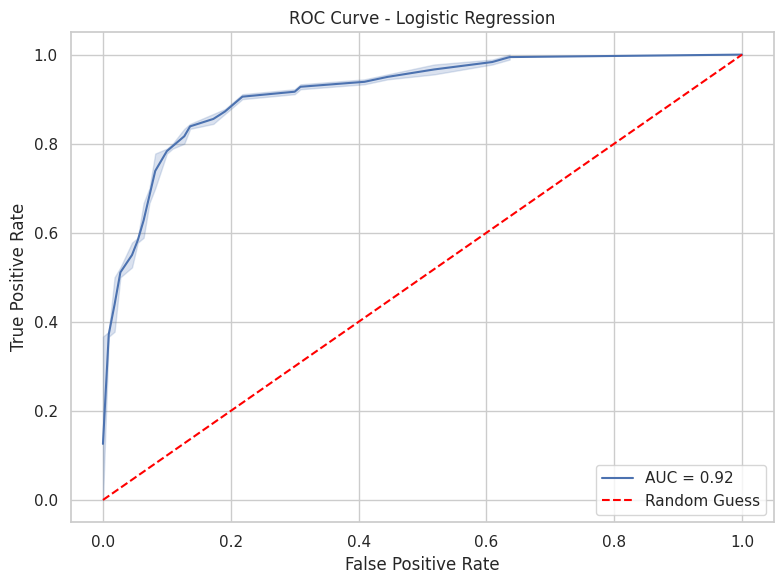

In [427]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

logreg_model = joblib.load('credit_risk_model.pkl')

y_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f"AUC = {auc_score:.2f}")
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


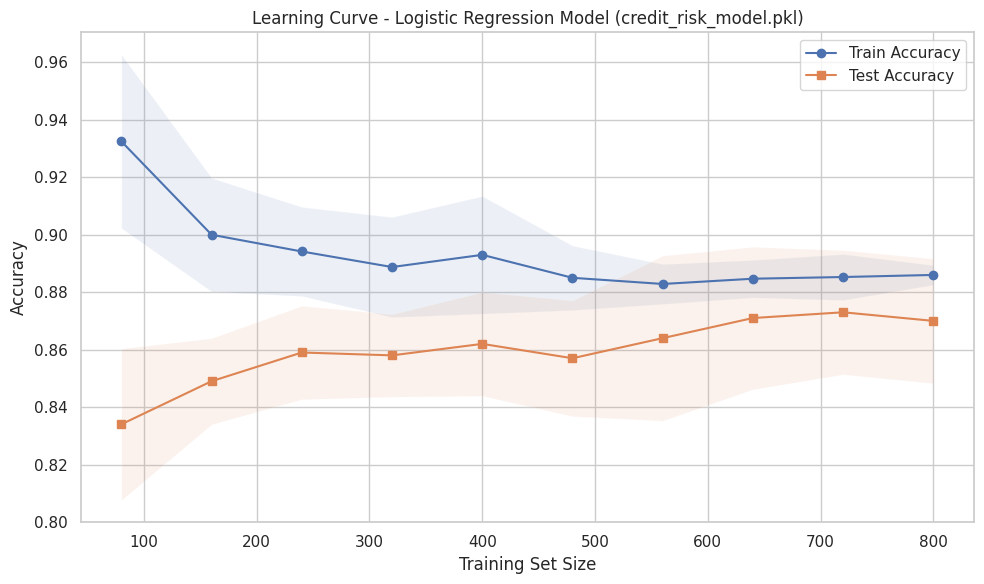

In [469]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

model = joblib.load('credit_risk_model.pkl')

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, test_mean, label='Test Accuracy', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title('Learning Curve - Logistic Regression Model (credit_risk_model.pkl)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [470]:
import pandas as pd
import joblib

logreg_pipeline = joblib.load('credit_risk_model.pkl')

critical_point = {
    'Age': 35,
    'Sex': 'male',
    'Job': 0,
    'Housing': 'rent',
    'Saving accounts': 'little',
    'Checking account': 'none',
    'Credit amount': 9000,
    'Duration': 24,
    'Purpose': 'furniture/equipment'
}

non_critical_point = {
    'Age': 45,
    'Sex': 'female',
    'Job': 2,
    'Housing': 'own',
    'Saving accounts': 'moderate',
    'Checking account': 'rich',
    'Credit amount': 3000,
    'Duration': 12,
    'Purpose': 'education'
}

test_df = pd.DataFrame([critical_point, non_critical_point])

test_df['Rule_Based_Prediction'] = test_df.apply(label_credit_risk, axis=1)

test_df['Model_Prediction'] = logreg_pipeline.predict(test_df)

test_df['Model_Prediction_Label'] = test_df['Model_Prediction'].map({0: 'Good', 1: 'Bad'})

print(test_df[['Age','Purpose', 'Credit amount', 'Job', 'Model_Prediction_Label']])


   Age              Purpose  Credit amount  Job Model_Prediction_Label
0   35  furniture/equipment           9000    0                    Bad
1   45            education           3000    2                   Good


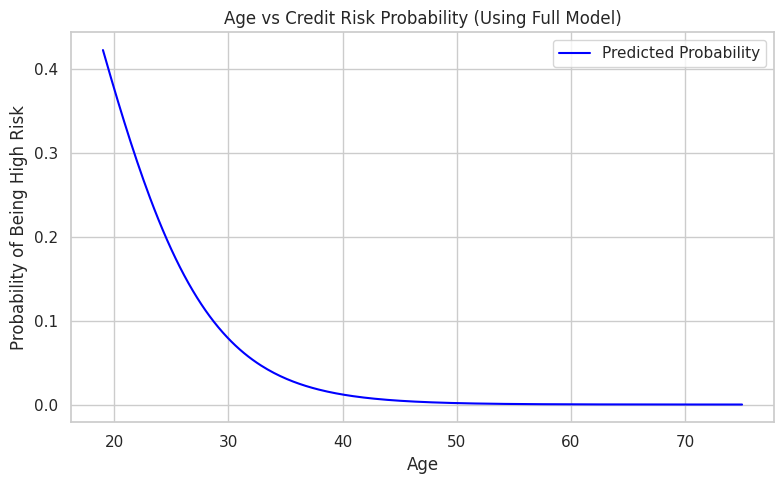

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

model = joblib.load('credit_risk_model.pkl')

feature_name = 'Age'


df_reference = df.copy()
fixed_values = df_reference.median(numeric_only=True).to_dict()
fixed_values.update({col: df_reference[col].mode()[0] for col in df_reference.select_dtypes(include='object').columns})

age_range = np.linspace(df['Age'].min(), df['Age'].max(), 300)
df_varying = pd.DataFrame([fixed_values] * len(age_range))
df_varying[feature_name] = age_range

y_prob = model.predict_proba(df_varying)[:, 1]


plt.figure(figsize=(8, 5))
plt.plot(age_range, y_prob, color='blue', label='Predicted Probability')
plt.title(f'{feature_name} vs Credit Risk Probability (Using Full Model)')
plt.xlabel(feature_name)
plt.ylabel('Probability of Being High Risk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

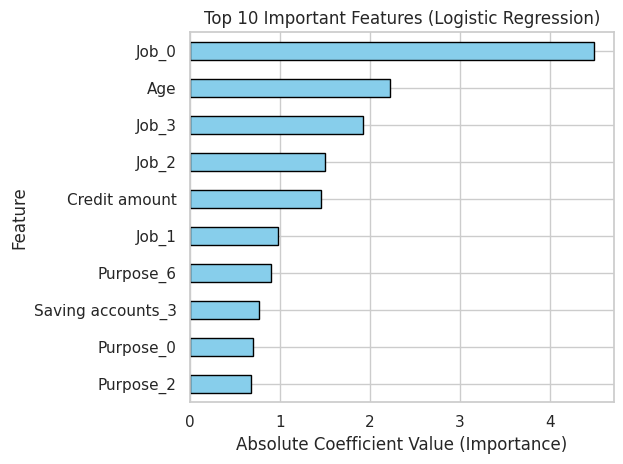

In [472]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

model = joblib.load('credit_risk_model.pkl')

preprocessor = model.named_steps['preprocessor']
logreg_model = model.named_steps['classifier']


categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_cols = ['Age', 'Credit amount', 'Duration']

categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)

numerical_feature_names = numerical_cols
all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

coefficients = logreg_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': np.abs(coefficients)
})

feature_importance.sort_values('Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
feature_importance.tail(10).plot.barh(x='Feature', y='Importance', color='skyblue', edgecolor='black', legend=False)
plt.title("Top 10 Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value (Importance)")
plt.tight_layout()
plt.show()


**Optimized**

In [473]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()
df['Risk_Label'] = label_encoder.fit_transform(df['Risk_Label'])

X = df.drop(columns=['Risk_Label'])
y = df['Risk_Label']

categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_cols = ['Age', 'Credit amount', 'Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__penalty': ['l2'],
}

# cross-validation
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

y_pred_logreg = grid_search.predict(X_test)

print("Logistic Regression Classification Report (Optimized):")
print(classification_report(y_test, y_pred_logreg))


Best Parameters from GridSearchCV: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Logistic Regression Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       147
           1       0.94      0.62      0.75        53

    accuracy                           0.89       200
   macro avg       0.91      0.80      0.84       200
weighted avg       0.90      0.89      0.88       200



In [475]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()
df['Risk_Label'] = label_encoder.fit_transform(df['Risk_Label'])

X = df.drop(columns=['Risk_Label'])
y = df['Risk_Label']

categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_cols = ['Age', 'Credit amount', 'Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__penalty': ['l2'],
}

grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

y_pred_logreg = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Optimized Logistic Regression Accuracy: {accuracy:.4f}")

print("Logistic Regression Classification Report (Optimized):")
print(classification_report(y_test, y_pred_logreg))


Best Parameters from GridSearchCV: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Optimized Logistic Regression Accuracy: 0.8900
Logistic Regression Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       147
           1       0.94      0.62      0.75        53

    accuracy                           0.89       200
   macro avg       0.91      0.80      0.84       200
weighted avg       0.90      0.89      0.88       200



In [476]:
import joblib

joblib.dump(grid_search.best_estimator_, 'optimized_credit_risk_model.pkl')

print("Model saved as 'optimized_credit_risk_model.pkl'")


Model saved as 'optimized_credit_risk_model.pkl'


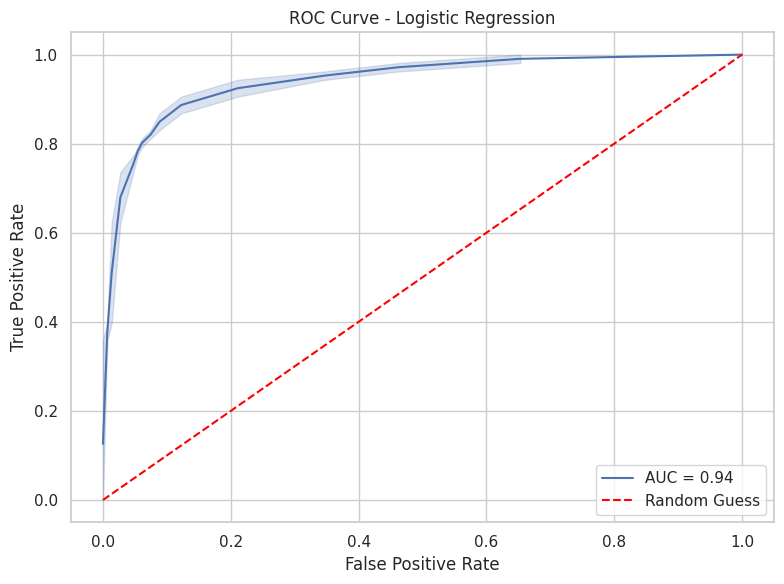

In [477]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

logreg_model = joblib.load('optimized_credit_risk_model.pkl')

y_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f"AUC = {auc_score:.2f}")
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


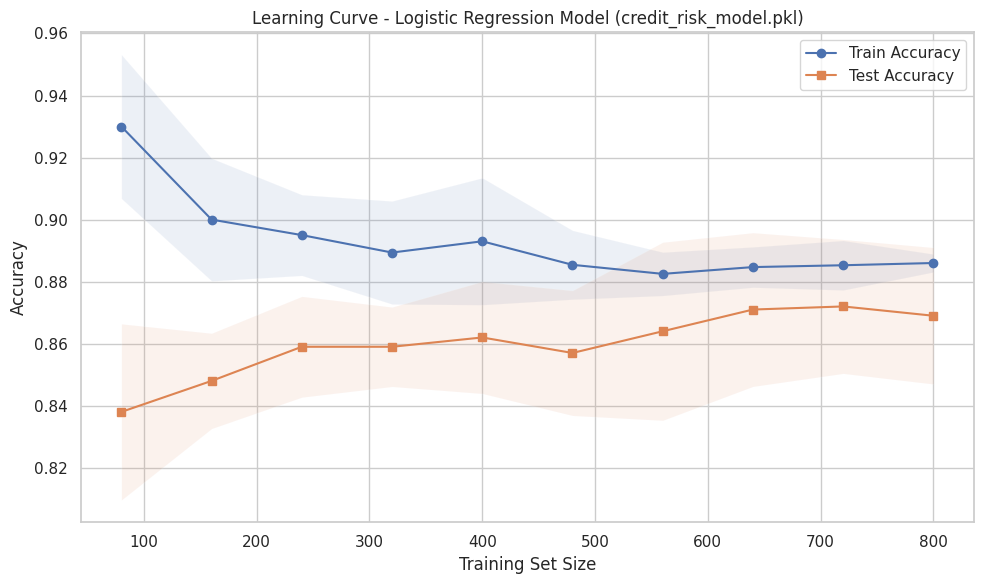

In [478]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

model = joblib.load('optimized_credit_risk_model.pkl')

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, test_mean, label='Test Accuracy', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title('Learning Curve - Logistic Regression Model (credit_risk_model.pkl)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [437]:
pip install --upgrade scikit-learn


In [479]:
model = joblib.load('optimized_credit_risk_model.pkl')

print(model.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Credit amount', 'Duration']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Job', 'Housing', 'Saving accounts',
                                  'Checking account', 'Purpose'])]), 'classifier': LogisticRegression(C=1, solver='liblinear')}


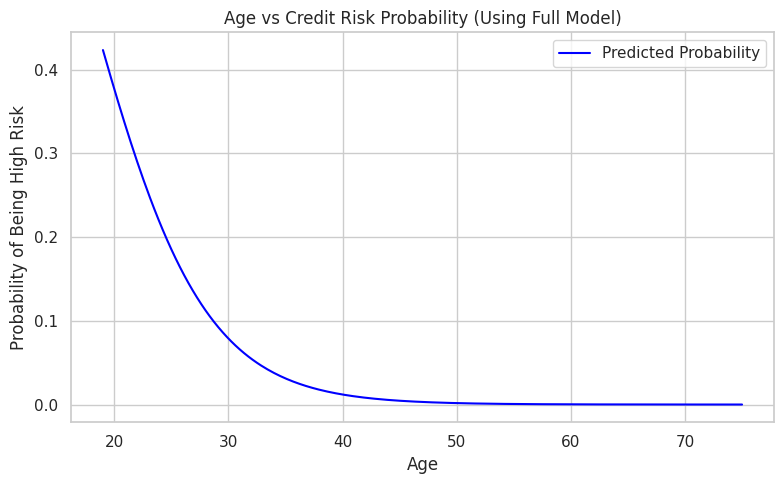

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

model = joblib.load('optimized_credit_risk_model.pkl')

feature_name = 'Age'

df_reference = df.copy()
fixed_values = df_reference.median(numeric_only=True).to_dict()
fixed_values.update({col: df_reference[col].mode()[0] for col in df_reference.select_dtypes(include='object').columns})

age_range = np.linspace(df['Age'].min(), df['Age'].max(), 300)
df_varying = pd.DataFrame([fixed_values] * len(age_range))
df_varying[feature_name] = age_range

y_prob = model.predict_proba(df_varying)[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(age_range, y_prob, color='blue', label='Predicted Probability')
plt.title(f'{feature_name} vs Credit Risk Probability (Using Full Model)')
plt.xlabel(feature_name)
plt.ylabel('Probability of Being High Risk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

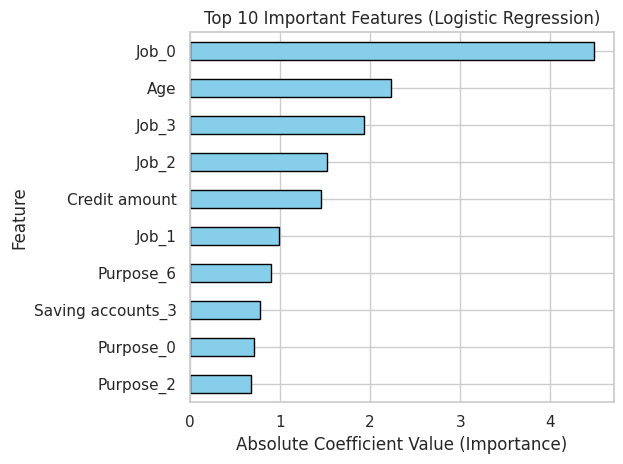

In [481]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

model = joblib.load('optimized_credit_risk_model.pkl')

preprocessor = model.named_steps['preprocessor']
logreg_model = model.named_steps['classifier']


categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_cols = ['Age', 'Credit amount', 'Duration']

categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)

numerical_feature_names = numerical_cols

all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

coefficients = logreg_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': np.abs(coefficients)
})

feature_importance.sort_values('Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
feature_importance.tail(10).plot.barh(x='Feature', y='Importance', color='skyblue', edgecolor='black', legend=False)
plt.title("Top 10 Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value (Importance)")
plt.tight_layout()
plt.show()


**Ensemble Model**

Ensemble Model Accuracy: 0.89

Confusion Matrix:
 [[145   2]
 [ 20  33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       147
           1       0.94      0.62      0.75        53

    accuracy                           0.89       200
   macro avg       0.91      0.80      0.84       200
weighted avg       0.90      0.89      0.88       200



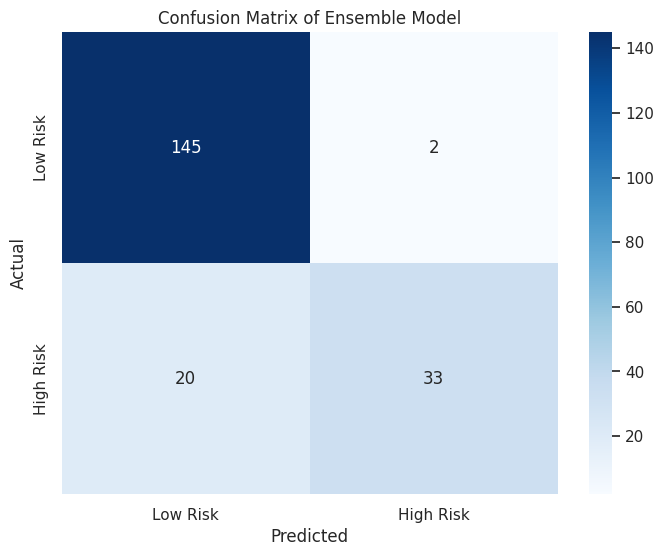

In [482]:
import joblib
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

model1 = joblib.load('credit_risk_model.pkl')
model2 = joblib.load('optimized_credit_risk_model.pkl')

preprocessor1 = model1.named_steps['preprocessor']
classifier1 = model1.named_steps['classifier']

preprocessor2 = model2.named_steps['preprocessor']
classifier2 = model2.named_steps['classifier']


X = df.drop('Risk_Label', axis=1)
y = df['Risk_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('model1', model1),
    ('model2', model2)
], voting='soft')

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.title("Confusion Matrix of Ensemble Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [483]:
import pandas as pd
import joblib
import numpy as np



logreg_pipeline_1 = joblib.load('credit_risk_model.pkl')
logreg_pipeline_2 = joblib.load('optimized_credit_risk_model.pkl')

additional_point = {
    'Age': 24,
    'Sex': 'female',
    'Job': 1,
    'Housing': 'own',
    'Saving accounts': 'rich',
    'Checking account': 'rich',
    'Credit amount': 4000,
    'Duration': 18,
    'Purpose': 'radio/tv'
}

critical_point = {
    'Age': 35,
    'Sex': 'male',
    'Job': 0,
    'Housing': 'rent',
    'Saving accounts': 'little',
    'Checking account': 'none',
    'Credit amount': 3000,
    'Duration': 24,
    'Purpose': 'education'
}

non_critical_point = {
    'Age': 45,
    'Sex': 'female',
    'Job': 2,
    'Housing': 'own',
    'Saving accounts': 'moderate',
    'Checking account': 'rich',
    'Credit amount': 3000,
    'Duration': 12,
    'Purpose': 'radio/tv'
}

test_df = pd.DataFrame([critical_point, non_critical_point, additional_point])


test_df['Model_1_Prediction'] = logreg_pipeline_1.predict(test_df)
test_df['Model_2_Prediction'] = logreg_pipeline_2.predict(test_df)

test_df['Model_1_Prediction_Label'] = test_df['Model_1_Prediction'].map({0: 'Good', 1: 'Bad'})
test_df['Model_2_Prediction_Label'] = test_df['Model_2_Prediction'].map({0: 'Good', 1: 'Bad'})

test_df['Ensemble_Prediction'] = test_df[['Model_1_Prediction','Model_2_Prediction']].mode(axis=1)[0]
test_df['Ensemble_Prediction_Label'] = test_df['Ensemble_Prediction'].map({0: 'Good', 1: 'Bad'})

print(test_df[['Age', 'Purpose', 'Credit amount', 'Job',
               'Model_1_Prediction_Label', 'Model_2_Prediction_Label',
                'Ensemble_Prediction_Label']])


   Age    Purpose  Credit amount  Job Model_1_Prediction_Label  \
0   35  education           3000    0                      Bad   
1   45   radio/tv           3000    2                     Good   
2   24   radio/tv           4000    1                      Bad   

  Model_2_Prediction_Label Ensemble_Prediction_Label  
0                      Bad                       Bad  
1                     Good                      Good  
2                      Bad                       Bad  
